imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
from dotenv import load_dotenv
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

Setup

In [23]:
load_dotenv()
data_path = os.getenv('DATA_PATH')
df = pd.read_csv('FDD DL UPDATE JUNE 2024.csv')
numeric_df = df.select_dtypes(include=['number'])
X = df.drop('Common-Protocol', axis=1)
X = df.drop("Bin Time Stamp", axis=1)
y = df['Common-Protocol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification

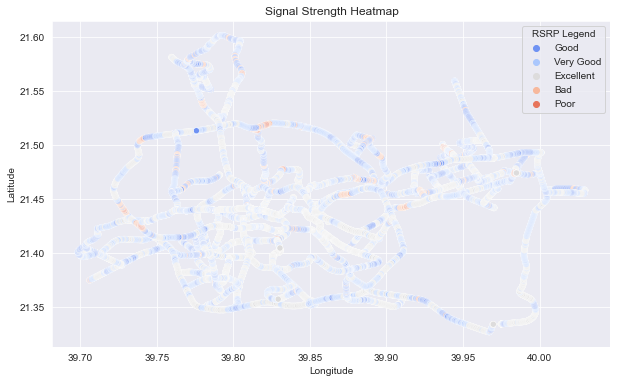

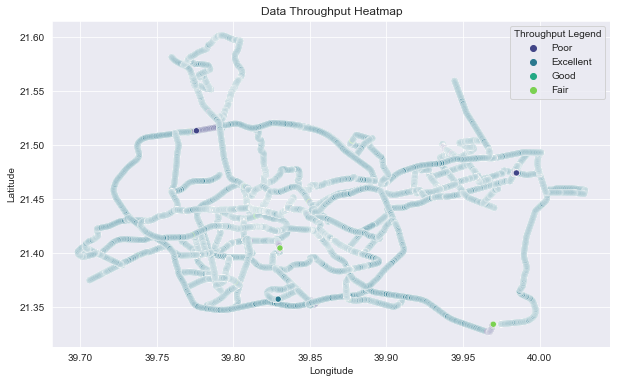

                 Serving RS Info-Serving RS CINR (d B)  \
Common-Protocol                                          
LTE                                           4.743162   
LTE-A                                         7.762620   

                 Serving RS Info-Serving RSRQ (d B)  
Common-Protocol                                      
LTE                                      -13.836444  
LTE-A                                    -14.285600  


In [25]:
# Convert the Bin Time Stamp to datetime
df['Bin Time Stamp'] = pd.to_datetime(df['Bin Time Stamp'])
# Define the classification functions
def classify_rsrp(rsrp):
    if rsrp >= -75:
        return 'Excellent'
    elif -85 < rsrp < -75:
        return 'Very Good'
    elif -95 < rsrp <= -85:
        return 'Good'
    elif -105 < rsrp <= -95:
        return 'Bad'
    else:
        return 'Poor'

def classify_throughput(throughput):
    if throughput >= 1000:
        return 'Excellent'
    elif 500 <= throughput < 1000:
        return 'Good'
    elif 100 <= throughput < 500:
        return 'Fair'
    else:
        return 'Poor'

def classify_rsrq(rsrq):
    if rsrq > -6:
        return 'Excellent'
    elif -10 < rsrq <= -6:
        return 'Very Good'
    elif -12 < rsrq <= -10:
        return 'Good'
    elif -14 < rsrq <= -12:
        return 'Fair'
    else:
        return 'Poor'

# Add the RSRP Legend column
df['RSRP Legend'] = df['RSRP (d Bm)-Dominant RSRP (d Bm) '].apply(classify_rsrp)

# Add the Throughput Legend column
df['Throughput Legend'] = df['LTE-Physical DSCH Throughput (kbps)'].apply(classify_throughput)

# Add the RSRQ Legend column
df['RSRQ Legend'] = df['Serving RS Info-Serving RSRQ (d B)'].apply(classify_rsrq)

# Save the updated DataFrame to the same CSV file
df.to_csv('MAKKAH VIR JULY LTE.csv', index=False)


# Analyze performance by network technology
performance_by_protocol = df.groupby('Common-Protocol').mean()
print(performance_by_protocol[[ 'Serving RS Info-Serving RS CINR (d B)', 'Serving RS Info-Serving RSRQ (d B)']])
##

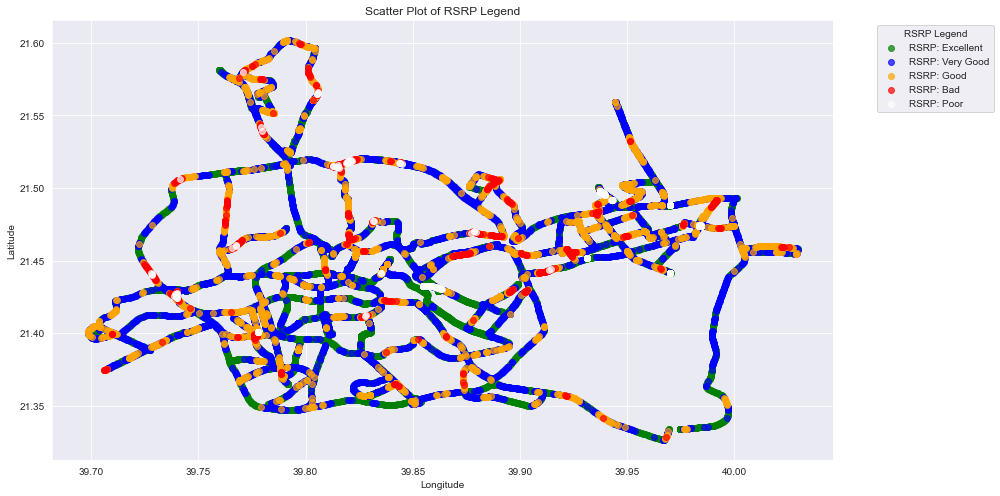

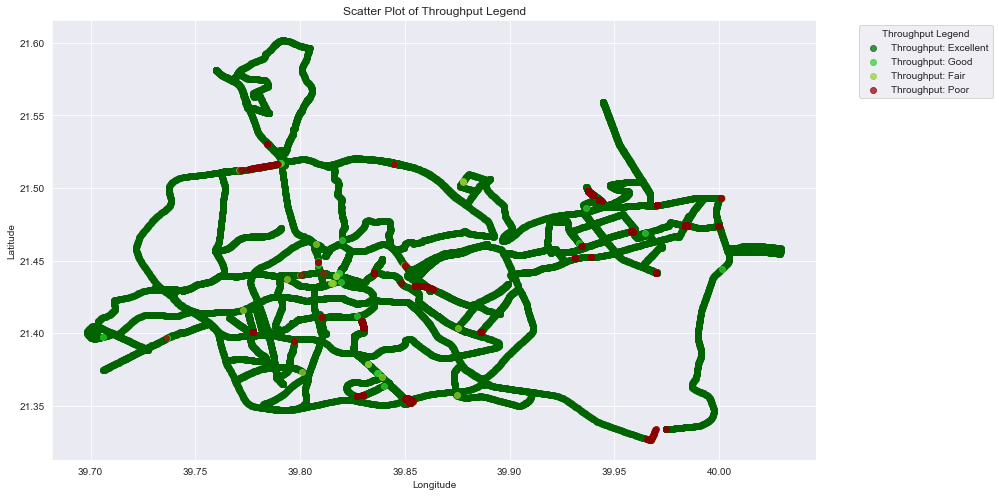

In [33]:
rsrp_colors = {
    'Excellent': 'green',
    'Very Good': 'blue',
    'Good': 'orange',
    'Bad': 'red',
    'Poor': 'white'
}

throughput_colors = {
    'Excellent': 'darkgreen',
    'Good': 'limegreen',
    'Fair': 'yellowgreen',
    'Poor': 'darkred'
}

plt.figure(figsize=(14, 7))
for legend, color in rsrp_colors.items():
    subset = df[df['RSRP Legend'] == legend]
    plt.scatter(subset['Longitude'], subset['Latitude'], color=color, label=f'RSRP: {legend}', alpha=0.7)

plt.legend(title='RSRP Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of RSRP Legend')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
for legend, color in throughput_colors.items():
    subset = df[df['Throughput Legend'] == legend]
    plt.scatter(subset['Longitude'], subset['Latitude'], color=color, label=f'Throughput: {legend}', alpha=0.7)

plt.legend(title='Throughput Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Throughput Legend')
plt.grid(True)
plt.tight_layout()
plt.show()


visualize the 61 cluster of makkah

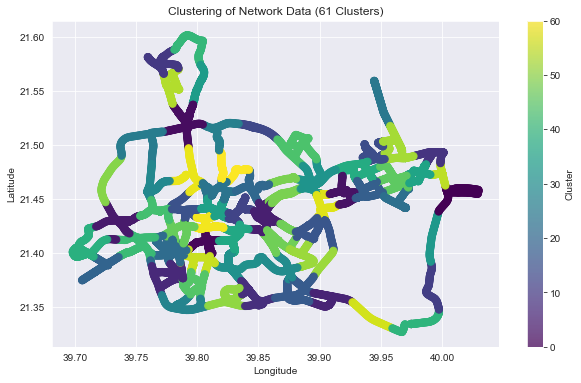

In [34]:
coordinates = df[['Longitude', 'Latitude']]

kmeans = KMeans(n_clusters=61, random_state=42)
df['Cluster'] = kmeans.fit_predict(coordinates)

# Save the updated dataset to a new CSV file
#df.to_csv('clustered_network_data.csv', index=False)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Network Data (61 Clusters)')
plt.show()

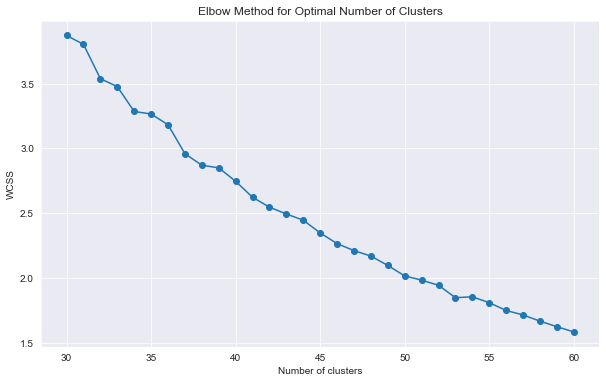

In [37]:
coordinates = df[['Longitude', 'Latitude']]

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(30, 61):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)

# Plot the WCSS
plt.figure(figsize=(10, 6))
plt.plot(range(30, 61), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

53 is the number of clusters according to the graph and elbow method

Visualize the 53 Clusters and save them in the actual dataset

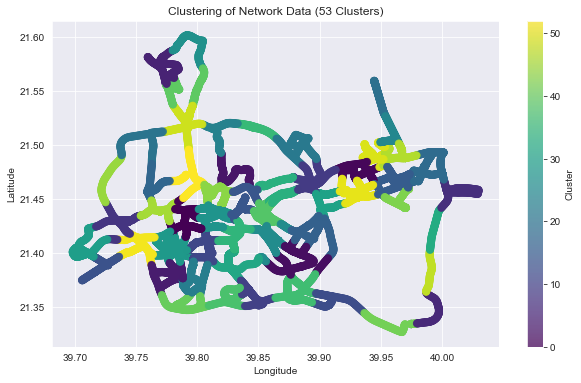

In [39]:
coordinates = df[['Longitude', 'Latitude']]

kmeans = KMeans(n_clusters=53, random_state=42)
df['Cluster'] = kmeans.fit_predict(coordinates)

# Save the updated dataset to a new CSV file
df.to_csv('clustered_network_data.csv', index=False)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Network Data (53 Clusters)')
plt.show()

In [47]:
ndf = pd.read_csv('clustered_network_data.csv')
cluster_means = ndf.groupby('Cluster').mean()
cluster_means
display(cluster_means)

,Id,Phone,Latitude,Longitude,Data Throughput-RLC DL Throughput (kbps),Serving Channel Info-DL EARFCN,Serving Cell Info-Serving PCI,RSRP (d Bm)-Dominant RSRP (d Bm),Serving RS Info-Serving RSRP (d Bm),Serving RS Info-Serving RS CINR (d B),Serving RS Info-Serving RSRQ (d B),Audio Quality.POLQA Downlink MOS-POLQA SWB,LTE-Physical DSCH Throughput (kbps),PCell-Strongest Serving PCell Avg DL PRB
Cluster,,,,,,,,,,,,,,
0,16473.405455,1.0,21.430950,39.790798,99212.531855,1459.800000,221.603636,-74.100545,-76.874127,5.233545,-14.566709,NaN,110989.913218,20.212527
1,6514.608863,1.0,21.477320,39.933466,140183.175703,775.811175,151.926782,-82.253102,-85.858536,6.395183,-17.076146,NaN,156423.439152,21.478439
2,12974.619792,1.0,21.393754,39.880030,141538.206098,1344.180556,205.930556,-74.222604,-77.207622,6.380990,-13.509601,NaN,158407.403728,17.247456
3,7988.014760,1.0,21.473936,39.827655,180334.353579,2139.114391,220.335793,-82.807934,-86.734797,12.660037,-12.013210,NaN,197405.639705,18.078339
4,8611.925656,1.0,21.378485,39.780086,116756.242274,2708.965015,297.236152,-74.692697,-78.735204,4.750875,-15.103105,NaN,131248.641356,21.944723
5,14610.162983,1.0,21.572870,39.772505,158233.050773,1310.649171,336.433702,-81.335856,-87.041077,7.885525,-13.235028,NaN,176476.128094,19.852431
6,11118.113821,1.0,21.345434,39.991673,293590.612195,1450.000000,210.382114,-69.888211,-72.971870,16.380488,-12.839512,NaN,332706.566098,6.058211
7,13469.553279,1.0,21.456501,40.012871,117836.125656,989.405738,255.295082,-81.513566,-85.579672,6.679426,-15.035844,NaN,130263.798648,20.840082
8,13720.221957,1.0,21.428831,39.739124,272582.000310,5146.935561,251.670644,-78.983628,-80.533270,16.382411,-12.185394,NaN,302232.610573,14.417494


In [2]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Sample data
df = px.data.iris()

# Initialize the app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    dcc.Graph(id='scatter-plot'),
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Sepal Width', 'value': 'sepal_width'},
            {'label': 'Sepal Length', 'value': 'sepal_length'},
            {'label': 'Petal Width', 'value': 'petal_width'},
            {'label': 'Petal Length', 'value': 'petal_length'}
        ],
        value='sepal_width'
    )
])

# Callback
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('dropdown', 'value')]
)
def update_figure(selected):
    fig = px.scatter(df, x=selected, y='sepal_length', color='species')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
ndf = pd.read_csv('clustered_network_data.csv')

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon=ndf['Longitude'],
    lat=ndf['Latitude'],
    mode='markers',
    marker=dict(
        size=10,
        color='blue',
        symbol='circle',
    )
))

# Update layout to focus on Saudi Arabia
fig.update_layout(
    title='Scattergeo Plot for Saudi Arabia',
    geo=dict(
        scope='asia',
        projection=go.layout.geo.Projection(type='mercator'),
        showland=True,
        landcolor='rgb(217, 217, 217)',
        center=dict(lon=45.0, lat=23.5),  # Center the map around Saudi Arabia
        lonaxis=dict(range=[34, 56]),  # Longitude range
        lataxis=dict(range=[16, 32]),  # Latitude range
    ),
)

# Show plot
pio.show(fig)
